<H3>Raman curve fit:</H3>
curve fit with 3 lorentz peaks of G, D, G' for CSV text outputs obtained by LabRam HR-800 <br>
2021.08.10 ver.0.1 by fur.    curve fit with LMFIT and shows fitting curves.<br>
2021.08.10 ver.0.11 by fur.    Get G/D area ratio, and G/D height ratio <br>
2021.08.10 ver.0.12 by fur.   File chooser only works for jupyter notebook using ipyfilechooser <br>

<H4>References:<H4>
<OL>
    <LI>LMFIT, https://lmfit.github.io/lmfit-py/</LI>
    <LI>https://sabopy.com/py/lmfit-5/</LI>
    <LI>Multi peak fitting, emilyripka, https://github.com/emilyripka/BlogRepo/blob/master/181119_PeakFitting.ipynb</LI>
</OL>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
from lmfit.lineshapes import lorentzian
from lmfit.models import LinearModel, LorentzianModel

In [3]:
from ipyfilechooser import FileChooser

In [4]:
# Create and displays a FileChooser widget
cwd = os.getcwd()
fc = FileChooser(cwd)
display(fc)

FileChooser(path='/Users/fur/src/git/ramanfit', filename='', title='HTML(value='', layout=Layout(display='none…

In [9]:
#INFILE = "20210726MJ_MWI_28ul_std-D1.txt"

In [10]:
INFILE = fc.selected
INFILE

'/Users/fur/src/git/ramanfit/20210726MJ_MWI_28ul_std-D1.txt'

In [11]:
# with open(INFILE, "r") as f:
#     print(f.read())

In [12]:
data = np.loadtxt(INFILE, delimiter='\t')

In [13]:
print(data)

[[ 200.       693.01123]
 [ 200.13351  693.27893]
 [ 200.26703  693.4198 ]
 ...
 [3599.7329   690.12152]
 [3599.8665   690.91632]
 [3600.       690.77484]]


In [14]:
x = data[:,0]
y = data[:,1]

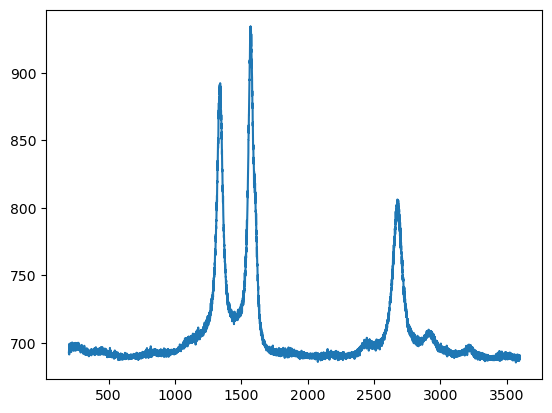

In [15]:
plt.plot(x,y);plt.show()

In [16]:
xDGindex1000=np.searchsorted(x,1000)

In [17]:
xDGindex2000=np.searchsorted(x,2000)

In [18]:
xDG = data[xDGindex1000:xDGindex2000,0]
yDG = data[xDGindex1000:xDGindex2000,1]

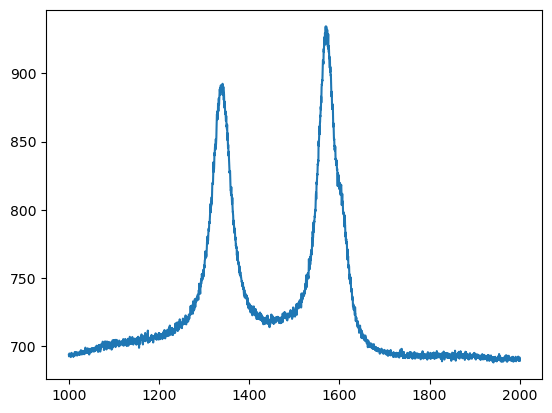

In [19]:
plt.plot(xDG,yDG);plt.show()

In [20]:
# LMFIT

In [21]:
bg = LinearModel(prefix='lin_')
pars = bg.guess(yDG, x=xDG)
#pars

In [22]:
lorentz1 = LorentzianModel(prefix='l1_')
#pars = lorentz1.guess(yDG, x=xDG)
pars.update(lorentz1.make_params())
pars['l1_center'].set(value=1336, min=1300, max=1380)
pars['l1_sigma'].set(value=10, min=5)
pars['l1_amplitude'].set(value=10000, min=5)
#pars

In [23]:
lorentz2 = LorentzianModel(prefix='l2_')
pars.update(lorentz2.make_params())

pars['l2_center'].set(value=1550, min=1500, max=1590)
pars['l2_sigma'].set(value=23, min=5)
pars['l2_amplitude'].set(value=15000, min=5)
#pars

In [24]:
lorentz3 = LorentzianModel(prefix='l3_')
pars.update(lorentz3.make_params())

pars['l3_center'].set(value=1603, min=1600, max=1650)
pars['l3_sigma'].set(value=10, min=5, max=100)
pars['l3_amplitude'].set(value=2000, min=5)
pars

name,value,initial value,min,max,vary,expression
lin_slope,-0.02434553,None,-inf,inf,True,
lin_intercept,763.459504,None,-inf,inf,True,
l1_amplitude,10000.0000,None,5.00000000,inf,True,
l1_center,1336.00000,None,1300.00000,1380.00000,True,
l1_sigma,10.0000000,None,5.00000000,inf,True,
l1_fwhm,20.0000000,None,-inf,inf,False,2.0000000*l1_sigma
l1_height,318.309900,None,-inf,inf,False,"0.3183099*l1_amplitude/max(1e-15, l1_sigma)"
l2_amplitude,15000.0000,None,5.00000000,inf,True,
l2_center,1550.00000,None,1500.00000,1590.00000,True,
l2_sigma,23.0000000,None,5.00000000,inf,True,


In [25]:
mod = lorentz1 + lorentz2 + lorentz3 + bg
init = mod.eval(pars, x=xDG)
out = mod.fit(yDG, pars, x=xDG)

In [26]:
print(out.fit_report())

[[Model]]
    (((Model(lorentzian, prefix='l1_') + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(linear, prefix='lin_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 172
    # data points      = 7490
    # variables        = 11
    chi-square         = 88102.2794
    reduced chi-square = 11.7799545
    Akaike info crit   = 18484.3228
    Bayesian info crit = 18560.4573
[[Variables]]
    lin_slope:     -0.01063559 +/- 1.4662e-04 (1.38%) (init = -0.02434553)
    lin_intercept:  709.731992 +/- 0.23283379 (0.03%) (init = 763.4595)
    l1_amplitude:   16179.1006 +/- 29.4506847 (0.18%) (init = 10000)
    l1_center:      1338.67299 +/- 0.03894993 (0.00%) (init = 1336)
    l1_sigma:       27.1482421 +/- 0.06203452 (0.23%) (init = 10)
    l1_fwhm:        54.2964843 +/- 0.12406904 (0.23%) == '2.0000000*l1_sigma'
    l1_height:      189.698024 +/- 0.27234210 (0.14%) == '0.3183099*l1_amplitude/max(1e-15, l1_sigma)'
    l2_amplitude:   1

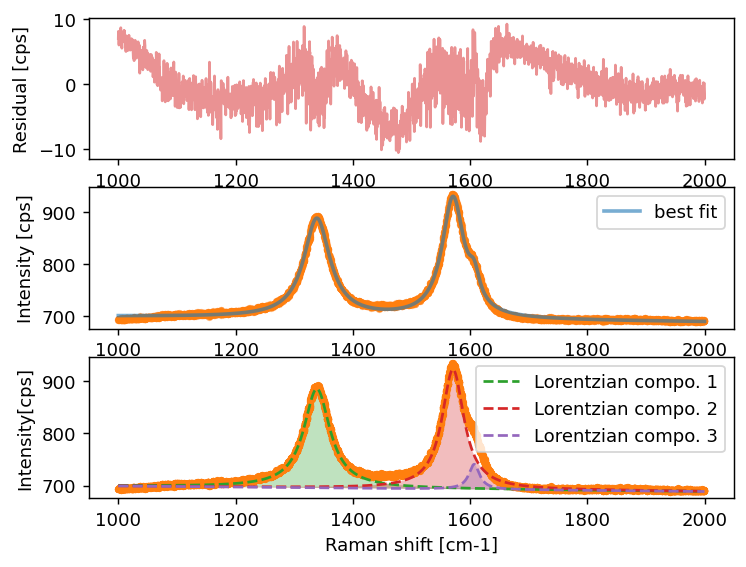

In [27]:
fig, ax = plt.subplots(3,1,dpi=130)
ax=ax.ravel()

ax[0].plot(xDG, out.best_fit - yDG, 'C3-', alpha=0.5)

ax[1].plot(xDG, yDG, 'C1.',alpha=0.5)
ax[1].plot(xDG, out.best_fit, '-', label='best fit',zorder=10,lw=2, alpha=0.6)

ax[2].plot(xDG, yDG, 'C1.')
comps = out.eval_components(x=xDG)
ax[2].plot(xDG, comps['l1_']+comps['lin_'], 'C2--', label='Lorentzian compo. 1')
ax[2].fill_between(xDG, comps['l1_']+comps['lin_'], comps['lin_'],facecolor='C2',alpha=0.3)
ax[2].plot(xDG, comps['l2_']+comps['lin_'], 'C3--', label='Lorentzian compo. 2')
ax[2].fill_between(xDG, comps['l2_']+comps['lin_'], comps['lin_'],facecolor='C3',alpha=0.3)
ax[2].plot(xDG, comps['l3_']+comps['lin_'], 'C4--', label='Lorentzian compo. 3')
ax[2].fill_between(xDG, comps['l3_']+comps['lin_'], comps['lin_'],facecolor='C4',alpha=0.3)

ax[0].set(xlabel="",ylabel="Residual [cps]")
ax[1].set(xlabel="",ylabel="Intensity [cps]")
ax[2].set(xlabel="Raman shift [cm-1]",ylabel="Intensity[cps]")
ax[1].legend(loc='best')
ax[2].legend(loc='best')

plt.savefig("ramfit.png",dpi=130)
plt.show()

In [28]:
for parname, param in out.params.items():
    print("%s = %f +/- %f " % (parname, param.value, param.stderr))

lin_slope = -0.010636 +/- 0.000147 
lin_intercept = 709.731992 +/- 0.232834 
l1_amplitude = 16179.100620 +/- 29.450685 
l1_center = 1338.672993 +/- 0.038950 
l1_sigma = 27.148242 +/- 0.062035 
l1_fwhm = 54.296484 +/- 0.124069 
l1_height = 189.698024 +/- 0.272342 
l2_amplitude = 16429.592774 +/- 48.799301 
l2_center = 1570.885997 +/- 0.046559 
l2_sigma = 22.786392 +/- 0.065817 
l2_fwhm = 45.572783 +/- 0.131634 
l2_height = 229.509882 +/- 0.329570 
l3_amplitude = 1689.344285 +/- 35.372511 
l3_center = 1607.035204 +/- 0.116911 
l3_sigma = 11.207385 +/- 0.214028 
l3_fwhm = 22.414769 +/- 0.428056 
l3_height = 47.980419 +/- 0.495366 


In [73]:
od=out.params

In [77]:
l1_height_stderr=od['l1_height'].stderr

In [78]:
l2_height_stderr=od['l2_height'].stderr

In [29]:
vd = out.params.valuesdict()

In [39]:
vd

OrderedDict([('lin_slope', -0.01063558910175176),
             ('lin_intercept', 709.7319917259013),
             ('l1_amplitude', 16179.100620325617),
             ('l1_center', 1338.672992667458),
             ('l1_sigma', 27.148242135087987),
             ('l1_fwhm', 54.296484270175974),
             ('l1_height', 189.69802445844783),
             ('l2_amplitude', 16429.592773816792),
             ('l2_center', 1570.8859972778857),
             ('l2_sigma', 22.786391583980546),
             ('l2_fwhm', 45.57278316796109),
             ('l2_height', 229.50988152731338),
             ('l3_amplitude', 1689.3442849095068),
             ('l3_center', 1607.0352043832038),
             ('l3_sigma', 11.20738454940301),
             ('l3_fwhm', 22.41476909880602),
             ('l3_height', 47.98041934090326)])

In [31]:
l2_area = np.pi * vd['l2_amplitude'] * vd['l2_fwhm']

In [32]:
l1_area = np.pi * vd['l1_amplitude'] * vd['l1_fwhm']

In [33]:
GDAreaRatio = l2_area / l1_area

In [34]:
GDAreaRatio

0.8523270379518724

In [35]:
l1_height = vd['l1_height']

In [36]:
l2_height = vd['l2_height']

In [37]:
GDHeightRatio = l2_height / l1_height

In [38]:
GDHeightRatio

1.2098696450978912

In [79]:
GDHeightRatioMax = (l2_height + l2_height_stderr) / (l1_height - l1_height_stderr)

In [80]:
GDHeightRatioMin = (l2_height - l2_height_stderr) / (l1_height + l1_height_stderr)

In [82]:
GDHeightRatioPlus = GDHeightRatioMax - GDHeightRatio

In [83]:
GDHeightRatioMinus = GDHeightRatio - GDHeightRatioMin

In [84]:
GDHeightRatioPlus

0.003479300622498682

In [85]:
GDHeightRatioMinus

0.0034693247504005154